# Lab 9: 	Case Study: Practicing functions with News Headlines and The General Social Survey data

In [1]:
library(tidyverse)
library(stringr)
library(forcats)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## 1 News Headlines

We are going to look through headlines from ABC News. The following loads the dataset we will use.


In [2]:
headlines = read_csv('https://raw.githubusercontent.com/byoungwookjang/stats306_labs/master/lab13/abcnews_2017.csv', 
                     col_types=list(col_character(), col_character()))
head(headlines)

publish_date,headline_text
<chr>,<chr>
20170101,1986 queensland cabinet documents released
20170101,actor william cristopher mash chaplain dead at 84
20170101,adelaide hip hop artist dreams becoming influential in australia
20170101,adelaide's new year's fireworks
20170101,adelaides new years fireworks
20170101,ambulances ferry injured to hospital istanbul nightclub attack


### 1.1

Add columns to `headlines` in which `publish_date` is converted the appropriate date format and there is an additional `id` variable that gives each headline a unique id number.

In [3]:
headlines = headlines %>% 
    mutate(publish_date=ymd(publish_date),
           id=row_number())

head(headlines)

publish_date,headline_text,id
<date>,<chr>,<int>
2017-01-01,1986 queensland cabinet documents released,1
2017-01-01,actor william cristopher mash chaplain dead at 84,2
2017-01-01,adelaide hip hop artist dreams becoming influential in australia,3
2017-01-01,adelaide's new year's fireworks,4
2017-01-01,adelaides new years fireworks,5
2017-01-01,ambulances ferry injured to hospital istanbul nightclub attack,6


### 1.2

Write a function `get_headlines` that takes a string `keyword` as an argument and returns a subset of `headlines` with only rows where the headline contains the given `keyword`. The returned dataframe should contain an additional column titled `keyword` that contains the keyword provided to the function. And make sure your function is not case-sensitive.

In [5]:
get_headlines = function(df, keyword) {
    keyword = tolower(keyword)
    result =  df%>% 
        filter(str_detect(headline_text, keyword)) %>%
        mutate(keyword=keyword)
    return(result)
}

headlines %>% get_headlines('trump') %>% head

publish_date,headline_text,id,keyword
<date>,<chr>,<int>,<chr>
2017-01-01,donald trump remains sceptical russia was behind hacking,22,trump
2017-01-02,donald trump indonesian business partner wants run for president,83,trump
2017-01-03,donald trump rebecca ferguson inauguration strange fruit,172,trump
2017-01-03,will president trump be the most pro israel president ever,261,trump
2017-01-04,bill and hillary clinton to attend donald trump inauguration,282,trump
2017-01-04,republican led us congress trump era groundwork,360,trump


Q: How many prime numbers are there in the first n integers?

#### For loop implementation:

In [12]:
# a helper fn
is.prime = function(num) {
   if (num == 2) {
      TRUE
   } else if (any(num %% 2:(num-1) == 0)) {
      FALSE
   } else { 
      TRUE
   }
}

In [6]:
num = 7
num %% 2:(num-1)
# remainder of 7 and (2, 3, 4, 5, 6)

[1] 1 1 3 2 1

In [13]:
# main function
prime.counter = function(n){
    total = 0 # start the counter
    for(num in 2:n){
        total = total + is.prime(num)
    }
    return(total)
}

<hr> 
<b>Short Lesson</b><br>
Mapping: The map functions transform their input by applying a function to each element and returning a vector the same length as the input. Great tool for parallelization

In [ ]:
# this is how it's done with applyer functions
1:10000 %>% map_lgl(is.prime) %>% sum

# mapping every number 1 thru 1000 to the is.prime() function

In [14]:
# Let's check prime.counter for first 10000 integers
prime.counter(10000)

[1] 1229

### 1.3

Using `get_headlines`, create a dataframe `headlines2` which, for each country in `country_interest`, contains the headlines associated with that country. The result should be a single dataframe. You should be able to do this with a one-liner.

In [20]:
country_interest = c('china', 'india', 'russia', 'syria', 'indonesia',
                     'japan', 'israel', 'iraq', 'iran', 'philippines',
                     'united states', 'france')

headlines2 = country_interest %>% 
map_dfr(~get_headlines(headlines,.))

# map_dfr() applies a function to each element of a list/vector/column and returns a dataframe

head(headlines2)

publish_date,headline_text,id,keyword
<date>,<chr>,<int>,<chr>
2017-01-03,human hair and rocket launchers now cheaper to export to china,193,china
2017-01-04,two wounded one dead after gun rampage in china,388,china
2017-01-05,china to spend $493 billion on renewable fuel by 2020,424,china
2017-01-05,economists fear official uschina trade war as yuan,434,china
2017-01-05,wine exporters to benefit from further china tariff reduction,531,china
2017-01-06,china harbin ice festival begins with spectacular sculptures,554,china


### 1.5 Do a country vs Number of headlines plot. Make sure the plot is in descending order of number of headlines

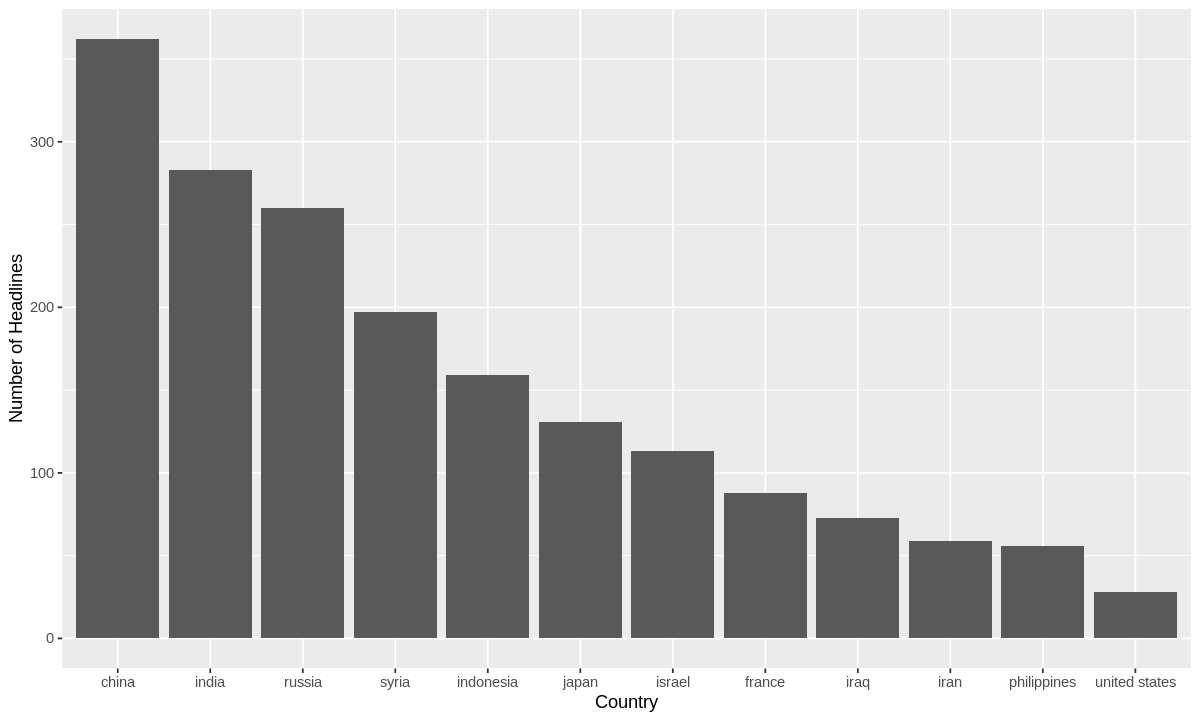

In [25]:
options(repr.plot.width=10, repr.plot.height=6)

res = headlines2 %>% group_by(keyword) %>% summarize(n=n())

ggplot(data=res, aes(x=reorder(keyword, -n), y=n)) + 
    geom_bar(stat='identity') + 
    labs(x='Country', y='Number of Headlines') #+
    #theme(axis.text.x = element_text(angle=45, hjust=1))

## 2 The General Social Survey

In [26]:
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


### 2.1 What is the median reported age for Jewish respondents?

In [27]:
gss_cat %>% filter(relig == 'Jewish') %>% 
summarize(median(age, na.rm=T)) %>% deframe # deframe gives us a number and not a 1x1 dataframe

"median(age, na.rm = T)"
<int>
53


### 2.2 Write a generalized function for above code. So for a given religion print out median age

In [28]:
f = function(x){
    gss_cat %>% filter(relig == x) %>% 
    summarize(median(age, na.rm=T)) %>% deframe
}
f('Jewish')

[1] 53

In [35]:
# Here is the religion list
gss_cat %>% select(relig) %>% unique

relig
<fct>
Protestant
Orthodox-christian
None
Christian
Jewish
Catholic
Other
Inter-nondenominational
Hinduism


In [30]:
f('Protestant'); f('None'); f('Hinduism')

[1] 49

[1] 38

[1] 33

### 2.3 Write a generalized function for above code so that your function can work with different statistics such as mean, var etc, but keep median as default option.

In [31]:
f = function(x, stat = median){
    gss_cat %>% filter(relig == x) %>% 
    summarize(stat(age, na.rm=T)) %>% deframe
}
f('Jewish', median); f('Jewish', mean); f('Hinduism', sd)

[1] 53

[1] 52.39535

[1] 13.07251

### 2.4 A millennial is defined to be someone who was 18 or younger in the year 2000. Are the millennials in this survey more likely to identify as atheist (relig =='None') compared to earlier generations?

In [36]:
gss_cat %>% 
    filter(!is.na(age)) %>%
    mutate(age_2000 = age - (year-2000),
           millenial = ifelse(age_2000 > 18, 
                              'not millenial', 'millenial')) %>%
    group_by(millenial) %>%
    summarize(Proportion = sum(relig=='None')/n(), religion = 'None')

millenial,Proportion,religion
<chr>,<dbl>,<chr>
millenial,0.2920228,None
not millenial,0.1501995,None


### 2.5 Generalize this by writing it for any religion

In [37]:
millenials = function(x){
    gss_cat %>% 
    filter(!is.na(age)) %>%
    mutate(age_2000 = age - (year-2000),
           millenial = ifelse(age_2000 > 18, 
                              'not millenial', 'millenial')) %>%
    group_by(millenial) %>%
    summarize(Proportion = sum(relig==x)/n(), religion = x)
}

In [38]:
millenials('Jewish')

millenial,Proportion,religion
<chr>,<dbl>,<chr>
millenial,0.01044634,Jewish
not millenial,0.01891094,Jewish


### 2.6 By using above function calculate generation trend table for all religions by calculating percent change in proportion

In [39]:
relTrend = gss_cat %>% select(relig) %>% unique %>% deframe %>%
map_dfr(millenials)

relTrend 

millenial,Proportion,religion
<chr>,<dbl>,<fct>
millenial,0.3584995252,Protestant
not millenial,0.5213201389,Protestant
millenial,0.0023741690,Orthodox-christian
not millenial,0.0046629708,Orthodox-christian
millenial,0.2920227920,None
not millenial,0.1501994715,None
millenial,0.0569800570,Christian
not millenial,0.0293767162,Christian
millenial,0.0104463438,Jewish
